## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].value_counts())
print(f"The number of mice is {number_of_mice}")

The number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_times = combined_data.groupby(["Timepoint", "Mouse ID"]).count()
grouped_times = grouped_times.loc[grouped_times["Sex"] > 1, :].reset_index
duplicate_ID = grouped_times().iloc[0,1]
duplicate_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID_data = combined_data.loc[combined_data["Mouse ID"] == duplicate_ID, :]
duplicate_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_index = duplicate_ID_data.index
combined_data_clean = combined_data.drop(duplicate_index)
combined_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(combined_data_clean["Mouse ID"].value_counts())
print(f"The number of mice is {number_of_mice}")

The number of mice is 248


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_object = combined_data_clean.groupby("Drug Regimen")

mean_volume = groupby_object.mean()
mean_volume = mean_volume["Tumor Volume (mm3)"]

median_volume = groupby_object.median()
median_volume = median_volume["Tumor Volume (mm3)"]

var_volume = groupby_object.var()
var_volume = var_volume["Tumor Volume (mm3)"]

stdev_volume = groupby_object.std()
stdev_volume = stdev_volume["Tumor Volume (mm3)"]

sem_volume = groupby_object.sem()
sem_volume = sem_volume["Tumor Volume (mm3)"]

drug_names = mean_volume.index

summary_table = pd.DataFrame(zip(mean_volume, median_volume, var_volume, stdev_volume, sem_volume), columns = ["Mean Tumor Volume", "Median Tumor Volume", "Variance Tumor Volume", "Std Dev Tumor Volume", "SEM Tumor Volume"]).set_index(drug_names)
summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

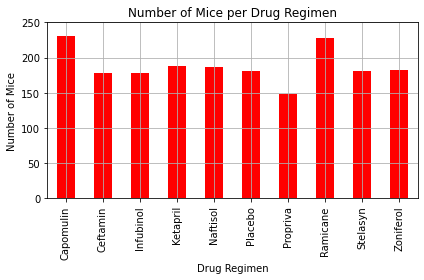

In [42]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice_per_treatment = groupby_object.count()
num_mice_per_treatment = num_mice_per_treatment["Mouse ID"]
num_mice_per_treatment.plot(kind = "bar", grid = True, color = "red")

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, 250)
plt.tight_layout()
plt.show()

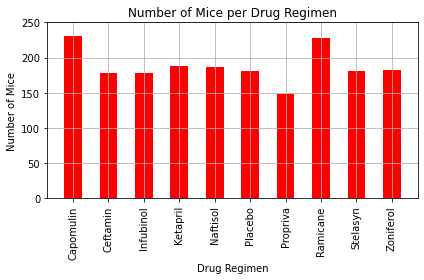

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(drug_names, num_mice_per_treatment, color = "red", width = 0.5)
plt.grid()
plt.xticks(rotation="vertical")

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, 250)
plt.tight_layout()
plt.show()

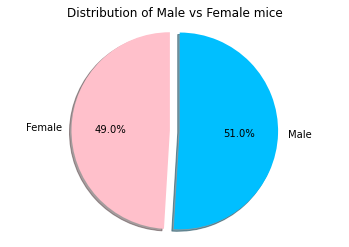

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_data_clean.groupby("Sex").count()
gender_count = gender_count["Mouse ID"]
gender_count

explode = (0, 0.1)
gender_count.plot(kind = "pie", shadow = True, autopct="%1.1f%%", colors = ["pink", "deepskyblue"], startangle = 90, explode = explode)

plt.title("Distribution of Male vs Female mice")
plt.ylabel("")
plt.axis("equal")
plt.show()

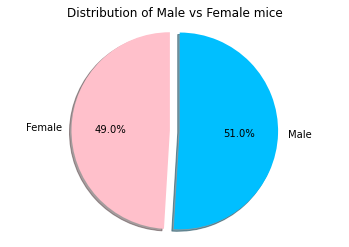

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0.1)
plt.pie(gender_count, shadow = True, autopct="%1.1f%%", colors = ["pink", "deepskyblue"], startangle = 90, labels = ["Female", "Male"], explode = explode)

plt.title("Distribution of Male vs Female mice")
plt.ylabel("")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
